## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Functions import * ## this can be used to import all functions stored in a .py file
from Initialize import * ## contains intial values
## ToDo: figure out how to use yaml files to 

4 Box Net flux is 0
9 Box Net flux is 0
90


Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

## 4 box model results, CO2 in air and ocean with 2 integration methods, RK4 and odeint

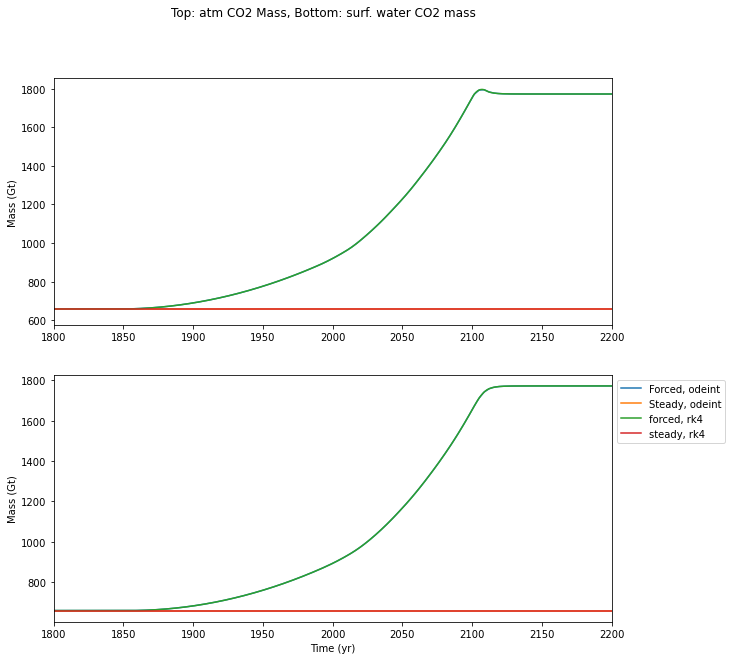

In [5]:
## Solveing the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.odeint(MassFlux_forced, M0_4, t, tfirst=True) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.odeint(MassFlux_Steady, M0_4, t, tfirst=True)
# RK4
[trk, Mrk] = rk4(MassFlux_forced, t_start, t_end, M0_4, 1000) 
[trkss, Mrkss] = rk4(MassFlux_Steady, t_start, t_end, M0_4, 1000) 
Mrk_real = np.real(Mrk) ## Take the real values only (I doubt there)
Mrkss_real = np.real(Mrkss) ## Take the real values only (I doubt there)

######## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(t, Mforced[:, box_num], label = 'Forced, odeint')
    plt.plot(t, Msteady[:, box_num], label = 'Steady, odeint')
    plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("Mass (Gt)")
    plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

4 box model with 0 emissions at 2110. Emissions cause inc in CO2 in both boxes but once stopped a new steady state is reached. This makes sense (math) because only emissions were added, need more sinks/added sinking mechanism to draw out CO2 from atmosphere. 

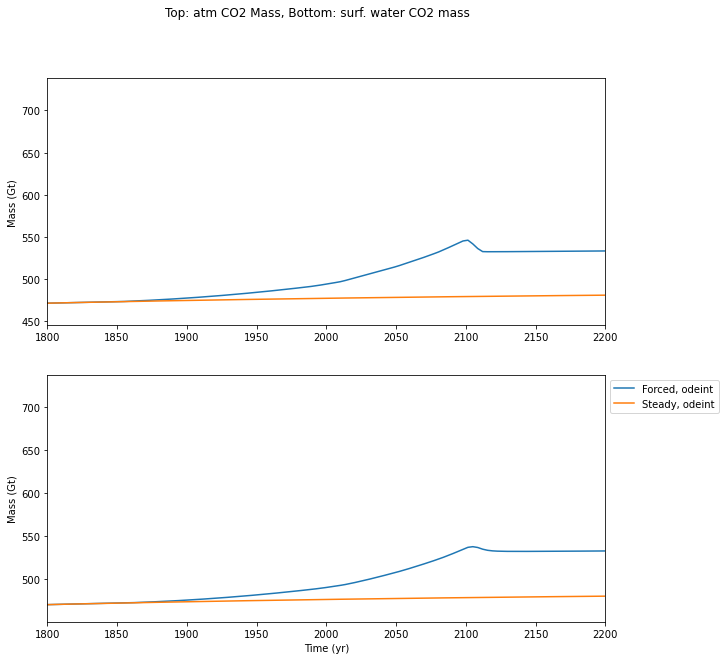

In [15]:
## Solveing the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.odeint(MassFlux_forced, M0_9, t, tfirst=True) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.odeint(MassFlux_Steady, M0_9, t, tfirst=True)
# RK4
[trk, Mrk] = rk4(MassFlux_forced, t_start, t_end, M0_9, 10) 
[trkss, Mrkss] = rk4(MassFlux_Steady, t_start, t_end, M0_9, 10) 
Mrk_real = np.real(Mrk) ## Take the real values only (I doubt there)
Mrkss_real = np.real(Mrkss) ## Take the real values only (I doubt there)

######## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(t, Mforced[:, box_num], label = 'Forced, odeint')
    plt.plot(t, Msteady[:, box_num], label = 'Steady, odeint')
    #plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    #plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("Mass (Gt)")
    plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Getting overflow errors on RK4 and the result is looking janky.. will need to be careful tweaking N so an actual solution using the method is found.